In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyextremes import EVA
from scipy.stats import genpareto
from scipy.stats import genextreme

# Cargar datos
datos = pd.read_excel('datos_viento.xlsx', sheet_name='waves P2 P6')

# Filtrar datos para P6 y eliminar valores nulos para Tp y Hmax
datos_p6_tp = datos[['Fecha y Hora', 'P6_Tp']].dropna()
datos_p6_hmax = datos[['Fecha y Hora', 'Hmax_P6']].dropna()

# Convertir 'Fecha y Hora' a índice de datetime
datos_p6_tp['Fecha y Hora'] = pd.to_datetime(datos_p6_tp['Fecha y Hora'])
datos_p6_tp.set_index('Fecha y Hora', inplace=True)

datos_p6_hmax['Fecha y Hora'] = pd.to_datetime(datos_p6_hmax['Fecha y Hora'])
datos_p6_hmax.set_index('Fecha y Hora', inplace=True)



Block Maxima (BM) Summary for Tp:
               return value   lower ci   upper ci
return period                                    
50.0              15.110605  12.772424  15.493695
100.0             15.270651  12.772424  15.747686
AIC for Block Maxima Tp: 108.93638843196086
BIC for Block Maxima Tp: 113.68694524732919


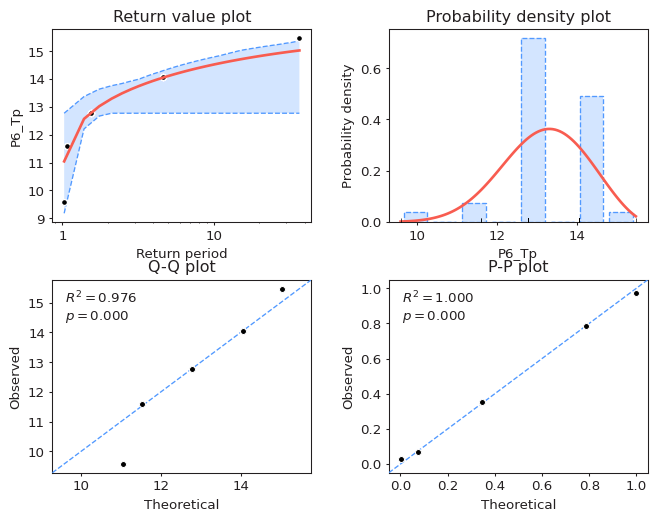

In [2]:
# Block Maxima para Tp
model_bm_tp = EVA(data=datos_p6_tp['P6_Tp'])

# Obtener los extremos usando Block Maxima con bloques anuales
model_bm_tp.get_extremes(method='BM', block_size='365D')

# Ajustar la distribución a los datos extremos
model_bm_tp.fit_model()

# Calcular los valores extremos para períodos de retorno de 50 y 100 años
ret_periods = [50, 100]
summary_bm_tp = model_bm_tp.get_summary(return_period=ret_periods, alpha=0.95)

# Imprimir el resumen para BM de Tp
print("Block Maxima (BM) Summary for Tp:")
print(summary_bm_tp)

# Ajustar la distribución Generalizada Extrema (GEV)
params_bm_tp = genextreme.fit(model_bm_tp.extremes)

# Obtener parámetros ajustados
shape_tp, loc_tp, scale_tp = params_bm_tp

# Calcular la log-verosimilitud
log_likelihood_bm_tp = genextreme.logpdf(model_bm_tp.extremes, shape_tp, loc=loc_tp, scale=scale_tp).sum()
k_bm_tp = 3  # número de parámetros en la distribución GEV
n_bm_tp = len(model_bm_tp.extremes)

# Calcular AIC y BIC
aic_bm_tp = 2 * k_bm_tp - 2 * log_likelihood_bm_tp
bic_bm_tp = np.log(n_bm_tp) * k_bm_tp - 2 * log_likelihood_bm_tp

print(f"AIC for Block Maxima Tp: {aic_bm_tp}")
print(f"BIC for Block Maxima Tp: {bic_bm_tp}")

# Mostrar gráficos de diagnóstico para el modelo BM de Tp
model_bm_tp.plot_diagnostic(alpha=0.95, figsize=(8, 6))
plt.show()

Block Maxima (BM) Summary for Hmax:
               return value   lower ci   upper ci
return period                                    
50.0              11.582679  10.883477  13.190651
100.0             11.929001  11.174542  14.555296
AIC for Block Maxima Hmax: 140.50268615143193
BIC for Block Maxima Hmax: 145.25324296680026


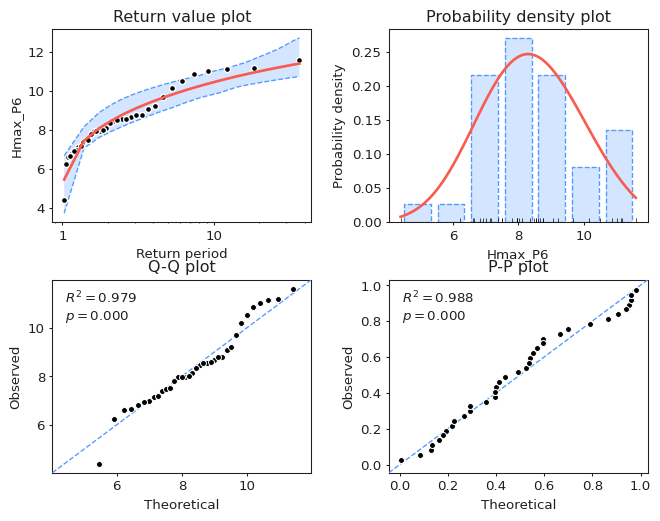

In [3]:
# Block Maxima para Hmax
model_bm_hmax = EVA(data=datos_p6_hmax['Hmax_P6'])

# Obtener los extremos usando Block Maxima con bloques anuales
model_bm_hmax.get_extremes(method='BM', block_size='365D')

# Ajustar la distribución a los datos extremos
model_bm_hmax.fit_model()

# Calcular los valores extremos para períodos de retorno de 50 y 100 años
summary_bm_hmax = model_bm_hmax.get_summary(return_period=ret_periods, alpha=0.95)

# Imprimir el resumen para BM de Hmax
print("Block Maxima (BM) Summary for Hmax:")
print(summary_bm_hmax)

# Ajustar la distribución Generalizada Extrema (GEV)
params_bm_hmax = genextreme.fit(model_bm_hmax.extremes)

# Obtener parámetros ajustados
shape_hmax, loc_hmax, scale_hmax = params_bm_hmax

# Calcular la log-verosimilitud
log_likelihood_bm_hmax = genextreme.logpdf(model_bm_hmax.extremes, shape_hmax, loc=loc_hmax, scale=scale_hmax).sum()
k_bm_hmax = 3  # número de parámetros en la distribución GEV
n_bm_hmax = len(model_bm_hmax.extremes)

# Calcular AIC y BIC
aic_bm_hmax = 2 * k_bm_hmax - 2 * log_likelihood_bm_hmax
bic_bm_hmax = np.log(n_bm_hmax) * k_bm_hmax - 2 * log_likelihood_bm_hmax

print(f"AIC for Block Maxima Hmax: {aic_bm_hmax}")
print(f"BIC for Block Maxima Hmax: {bic_bm_hmax}")

# Mostrar gráficos de diagnóstico para el modelo BM de Hmax
model_bm_hmax.plot_diagnostic(alpha=0.95, figsize=(8, 6))
plt.show()


In [4]:
# Obtener los valores de return period para Tp
tp_50 = summary_bm_tp.loc[50.0, 'return value']
tp_100 = summary_bm_tp.loc[100.0, 'return value']

# Asumiendo que has realizado un análisis similar para Hmax y tienes summary_bm_hmax
# Obtener los valores de return period para Hmax
hmax_50 = summary_bm_hmax.loc[50.0, 'return value']
hmax_100 = summary_bm_hmax.loc[100.0, 'return value']

print(f"Tp for 50 years return period: {tp_50}")
print(f"Tp for 100 years return period: {tp_100}")
print(f"Hmax for 50 years return period: {hmax_50}")
print(f"Hmax for 100 years return period: {hmax_100}")


Tp for 50 years return period: 15.110604755638429
Tp for 100 years return period: 15.270650722089771
Hmax for 50 years return period: 11.582679312855012
Hmax for 100 years return period: 11.929000792855177
